In [4]:
import torch
import numpy as np


In [5]:
data = [[1, 2], [3, 4]]
print(data)
x_data = torch.tensor(data)
print(x_data)


[[1, 2], [3, 4]]
tensor([[1, 2],
        [3, 4]])


In [6]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np


tensor([[1, 2],
        [3, 4]])

In [7]:
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones}\n")
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand}\n")


Ones Tensor: 
 tensor([[1, 1],
        [1, 1]])

Random Tensor: 
 tensor([[0.6961, 0.0972],
        [0.2569, 0.1686]])



In [8]:
shape = (2, 3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print("Random\n", rand_tensor)
print("Ones\n", ones_tensor)
print("Zeros\n", zeros_tensor)


Random
 tensor([[0.9312, 0.4015, 0.7437],
        [0.7236, 0.2887, 0.0734]])
Ones
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
tensor = torch.rand(3, 4)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)


torch.Size([3, 4])
torch.float32
cpu


In [10]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
else: 
    print('CPU 사용하셈')


CPU 사용하셈


In [11]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print("\n", tensor)


First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])

 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [12]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
t1


tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])

In [13]:
# y1, y2, y3는 같은 값
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

# z1, z2, z3는 같은 값
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [14]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))


12.0 <class 'float'>


In [50]:
print(tensor)
tensor.add_(5)
print(tensor)


tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [51]:
t = torch.ones(5)
print(t)
n = t.numpy()
print(n)


tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [53]:
t.add_(1)
print(t)
print(n)


tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [58]:
n = np.ones(5)
t = torch.from_numpy(n)


In [59]:
np.add(n, 1, out=n)
print(t)
print(n)


tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[2. 2. 2. 2. 2.]


# 2장


In [15]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)


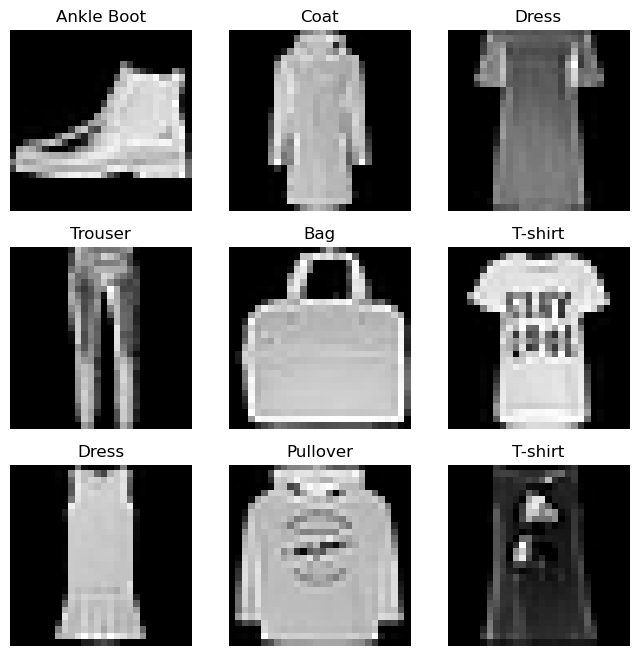

In [16]:
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()


In [17]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [19]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


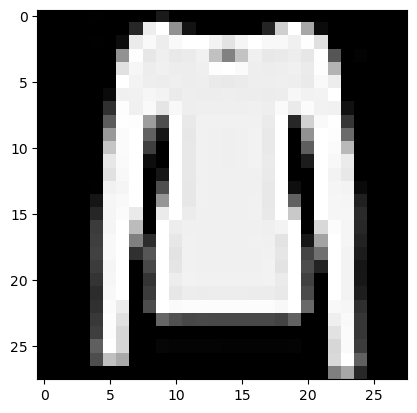

Label: 2


In [26]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {label}")

# Transform

In [29]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# 신경망 모델 구성

In [30]:
import os 
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [31]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else 'mps' 
    if torch.backends.mps.is_available()
    else 'cpu'
)
print(f"Using {device} device")

Using mps device


In [33]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [34]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [37]:
X = torch.rand(1, 28, 28, device=device) # 이미지처럼 취급
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([5], device='mps:0')


In [39]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [41]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [42]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [45]:
print(f"Before ReLU: {hidden1}\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU(): {hidden1}")

Before ReLU: tensor([[0.0000, 0.1234, 0.1895, 0.0000, 0.5017, 0.0144, 0.0398, 0.0000, 0.0000,
         0.0000, 0.5140, 0.1301, 0.2168, 0.0000, 0.0952, 0.4404, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.1800, 0.0000, 0.5863, 0.3843, 0.0000, 0.0000, 0.0511,
         0.0000, 0.3941, 0.0000, 0.1159, 0.0000, 0.0000, 0.4542, 0.0000, 0.3888,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0533, 0.0000, 0.0000, 0.0978, 0.0000, 0.0000, 0.0000,
         0.0000, 0.2445, 0.0000, 0.2537, 0.0000, 0.1254, 0.4176, 0.0000, 0.0958,
         0.0000, 0.0288]], grad_fn=<ReluBackward0>)

After ReLU(): tensor([[0.0000, 0.1234, 0.1895, 0.0000, 0.5017, 0.0144, 0.0398, 0.0000, 0.0000,
         0.0000, 0.5140, 0.1301, 0.2168, 0.0000, 0.0952, 0.4404, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.1800, 0.0000, 0.5863, 0.3843, 0.0000, 0.0000, 0.0511,
         0.0000, 0.3941, 0.0000, 0.1159, 0.0000, 0.0000, 0.4542, 0.0000, 0.3888,
         0.0000, 0.0000],
      

In [49]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)
print(logits)

tensor([[-0.2269, -0.0697, -0.1991,  0.1398,  0.3669, -0.0553,  0.2966,  0.0467,
          0.1610, -0.1732],
        [-0.2675, -0.1341, -0.1646,  0.1725,  0.3260, -0.1067,  0.2542,  0.0043,
          0.1625, -0.1580],
        [-0.1634, -0.0643, -0.1489,  0.0602,  0.2179, -0.2266,  0.2733,  0.0061,
          0.1471, -0.0656]], grad_fn=<AddmmBackward0>)


In [55]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [59]:
print(f'Model Structure: {model}\n')

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]}\n")

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0283, -0.0088,  0.0184,  ..., -0.0186,  0.0229,  0.0086],
        [ 0.0268, -0.0164, -0.0245,  ..., -0.0081, -0.0269,  0.0004]],
       device='mps:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([-0.0099, -0.0240], device='mps:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[-0.0111, -0.0091, -0.0219,  ..., -0.0174,  0.0353, -0.0058],
        [ 0.0141,  0.0154,  0.0059,  ...,  0.0360,  0.0339,  0.0018]],
       device='mps:0', grad_fn=<SliceBackwa

# torch.autograd를 사용한 자동미분

In [72]:
import torch

x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [73]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x14fe1e380>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x14fe1cbe0>


In [74]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0364, 0.3138, 0.2363],
        [0.0364, 0.3138, 0.2363],
        [0.0364, 0.3138, 0.2363],
        [0.0364, 0.3138, 0.2363],
        [0.0364, 0.3138, 0.2363]])
tensor([0.0364, 0.3138, 0.2363])


In [76]:
z = torch.matmul(x, w) + b
print(z.requires_grad)
with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False
